# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Traffic Sign Recognition Classifier
---

## 1- Load The Data

In [1]:
# Load pickled data
import pickle
# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_rgb, y_train = train['features'], train['labels']
X_valid_rgb, y_valid = valid['features'], valid['labels']
X_test_rgb,  y_test  = test['features'],   test['labels']

#### 1-1- Summary of the Data Set

In [2]:
import numpy as np
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = train['labels'].shape[0]

# TODO: Number of validation examples
n_validation = valid['labels'].shape[0]

# TODO: Number of testing examples.
n_test = test['labels'].shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = train['features'][0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))


print("Number of training examples........", n_train)
print("Number of validation examples......", n_validation)
print("Number of testing examples.........", n_test)
print("Image data shape...................", image_shape)
print("Image data type....................", train['features'].dtype)
print("Number of classes..................", n_classes)
print("Labels of classes data type........", train['labels'].dtype)

Number of training examples........ 34799
Number of validation examples...... 4410
Number of testing examples......... 12630
Image data shape................... (32, 32, 3)
Image data type.................... uint8
Number of classes.................. 43
Labels of classes data type........ uint8


#### 1-2- An exploratory visualization of the dataset

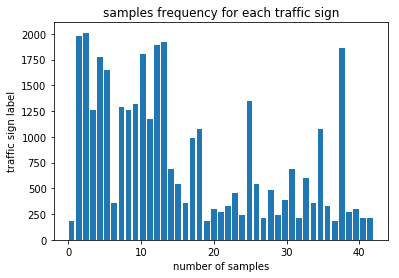

In [3]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# histogram of label frequency
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("samples frequency for each traffic sign")
plt.xlabel("number of samples")
plt.ylabel("traffic sign label")
plt.show()



examples from database with lable on it:


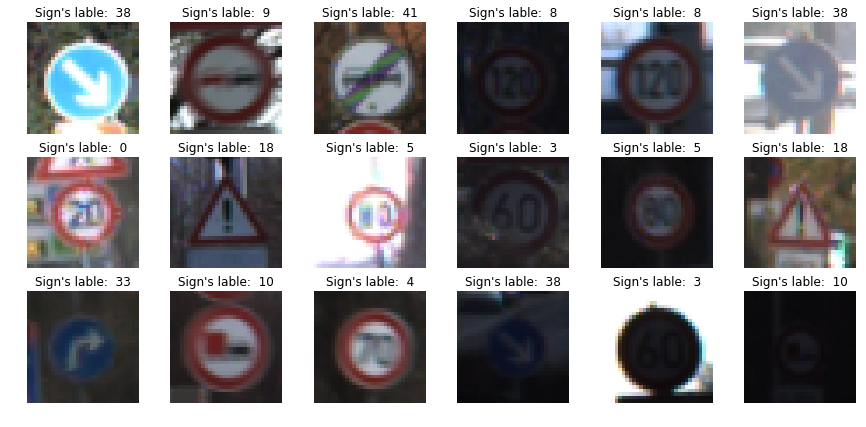

In [4]:
print('examples from database with lable on it:')
np.random.seed(100)
images_list = np.random.randint(0, n_train, 18)
f, axs = plt.subplots(3, 6, figsize=(15,7))
for i in range(18):
    axs[i//6, i%6].axis('off')
    axs[i//6, i%6].set_title('Sign\'s lable:  {}'.format(y_train[images_list[i]]))
    axs[i//6, i%6].imshow(X_train_rgb[images_list[i]])

## Pre-process the Data Set

In [5]:
import cv2

### define some function for pre-processing
### transform color space, rgb to yuv
### histogram equalizer
### perturbing images by
### rotating, scaling and translation

def rgb2yuv(images):
    ### transform color space, rgb to yuv
    ### input:   it is a 4 dimentional array and contains 3 channel images
    ###          the last dimentional is the channel of rgb image
    ### output:  it is the same dimentional array
    yuv_img = np.zeros_like(images, dtype=np.float32)
    yuv_img[:,:,:,0] = images[:,:,:,0] *  .299000 + images[:,:,:,1] *  .587000 + images[:,:,:,2] *  .114000
    yuv_img[:,:,:,1] = images[:,:,:,0] * -.168736 + images[:,:,:,1] * -.331264 + images[:,:,:,2] *  .500000 + 128
    yuv_img[:,:,:,2] = images[:,:,:,0] *  .500000 + images[:,:,:,1] * -.418688 + images[:,:,:,2] * -.081312 + 128
    return yuv_img

def histogram_equalizer(images):
    equalized_imgs = np.zeros((images.shape[0],32,32,1), dtype=np.float32)
    for i in range(images.shape[0]):
        equalized_imgs[i,:,:,0] = cv2.equalizeHist(images[i,:,:,0].astype(np.uint8))
    return equalized_imgs

def perturb_image(image, angle, scale=1.0):
    rot_mat = cv2.getRotationMatrix2D((15.5, 15.5), angle, scale)
    dst = cv2.warpAffine(image, rot_mat, (32,32), flags=cv2.INTER_LINEAR)
    dst = np.reshape(dst, (32, 32, 1))
    return dst

def translate_image(image, tx, ty):
    img = np.pad(image, ((2,2),(2,2)), 'constant')
    offset_x = 2 + tx
    offset_y = 2 + ty
    end_x = offset_x + 32
    end_y = offset_y + 32
    dst= img[offset_x:end_x, offset_y:end_y]
    dst = np.reshape(dst, (32, 32, 1))
    return dst

image preprocessing...
converting rgb to yuv...
-------------------------
Y channel examples:


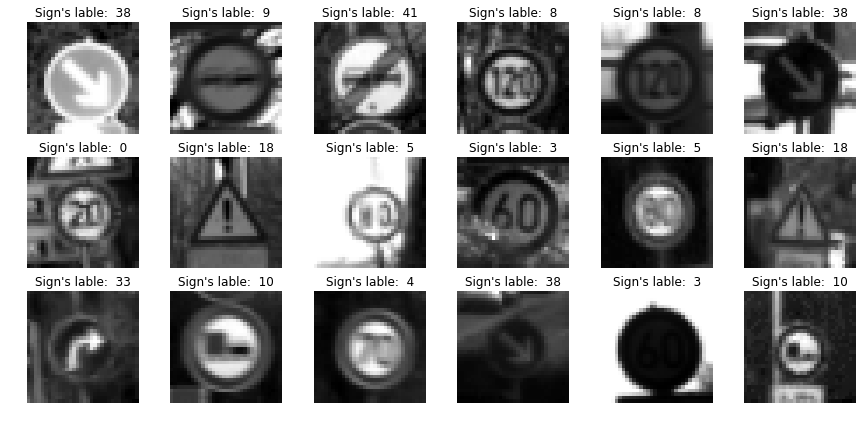

In [6]:
print('image preprocessing...')
print('converting rgb to yuv...')
print('-------------------------')
# rgb to yuv
X_train = rgb2yuv(X_train_rgb)
X_valid = rgb2yuv(X_valid_rgb)
X_test =  rgb2yuv(X_test_rgb)
print('Y channel examples:')
f, axs = plt.subplots(3, 6, figsize=(15,7))
for i in range(18):
    axs[i//6, i%6].axis('off')
    axs[i//6, i%6].set_title('Sign\'s lable:  {}'.format(y_train[images_list[i]]))
    axs[i//6, i%6].imshow(X_train[images_list[i],:,:,0], cmap='gray')

equalizing histogram...
-------------------------
equalizing histogram result's examples on Y channel...


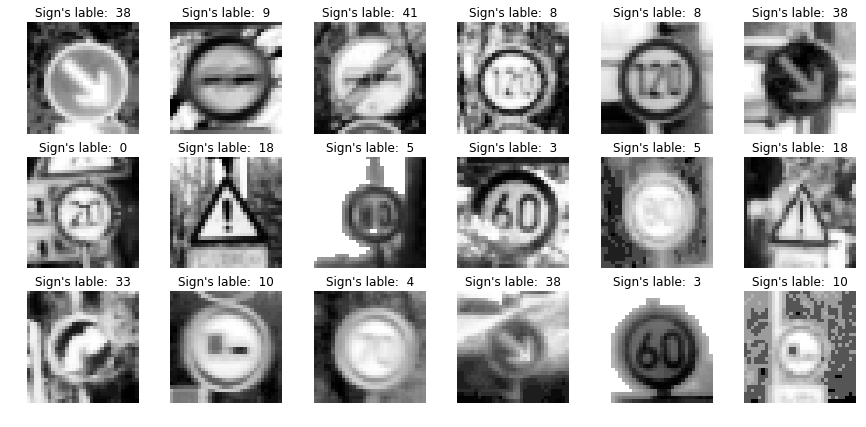

In [7]:
print('equalizing histogram...')
print('-------------------------')
X_train = histogram_equalizer(X_train)
X_valid = histogram_equalizer(X_valid)
X_test  = histogram_equalizer(X_test)

print('equalizing histogram result\'s examples on Y channel...')

f, axs = plt.subplots(3, 6, figsize=(15,7))
for i in range(18):
    axs[i//6, i%6].axis('off')
    axs[i//6, i%6].set_title('Sign\'s lable:  {}'.format(y_train[images_list[i]]))
    axs[i//6, i%6].imshow(X_train[images_list[i],:,:,0], cmap='gray')

test perturbations on a sample of train set


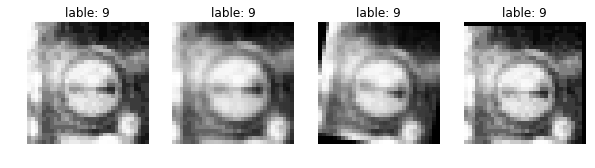

In [8]:
img = X_train[12345,:,:,0]
scale = np.random.uniform(0.9, 1.1, 1)
s_img = perturb_image(img, 0, scale)

rot = np.random.randint(-15, 16, size=1)
r_img = perturb_image(img, rot, 1)

[tx, ty] = np.random.randint(-2, 3, size=2)
t_img = translate_image(img, tx, ty)

f, axs = plt.subplots(1, 4, figsize=(10,10))
axs[0].axis('off')
axs[0].set_title('lable: {}'.format(y_train[12345]))
axs[0].imshow(img, cmap='gray')

axs[1].axis('off')
axs[1].set_title('lable: {}'.format(y_train[12345]))
axs[1].imshow(s_img[:,:,0], cmap='gray')

axs[2].axis('off')
axs[2].set_title('lable: {}'.format(y_train[12345]))
axs[2].imshow(r_img[:,:,0], cmap='gray')

axs[3].axis('off')
axs[3].set_title('lable: {}'.format(y_train[12345]))
axs[3].imshow(t_img[:,:,0], cmap='gray')
print('test perturbations on a sample of train set')

100%|██████████| 34799/34799 [00:07<00:00, 4379.97it/s]


extended database:


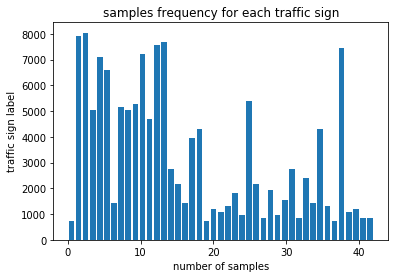

In [9]:
from tqdm import tqdm

### extending database with perturbing availablen images
### like rotating between -15 and 15 degrees
### scaling between 0.9 and 1.1
### translating from -2 to 2 pixel in every direction

X_extended = np.zeros((n_train*4, 32, 32, 1), dtype=np.float32)
y_extended = np.zeros((n_train*4), dtype=np.float32)
for i in tqdm(range(n_train)):
    img = X_train[i,:,:,0]
    label = y_train[i]
    X_extended[4*i,:,:,0] = img
    y_extended[4*i] = label
    
    X_extended[4*i+1] = perturb_image(img, 0, np.random.uniform(0.9, 1.1, 1))
    y_extended[4*i+1] = label
    
    X_extended[4*i+2] = perturb_image(img, np.random.randint(-15, 16, size=1), 1)
    y_extended[4*i+2] = label
    
    [tx, ty] = np.random.randint(-2, 3, size=2)
    X_extended[4*i+3] = translate_image(img, tx, ty)
    y_extended[4*i+3] = label

print("extended database:")
# histogram of label frequency
hist, bins = np.histogram(y_extended, bins=n_classes)
width = 0.8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("samples frequency for each traffic sign")
plt.xlabel("number of samples")
plt.ylabel("traffic sign label")
plt.show()


normalization...
result's examples


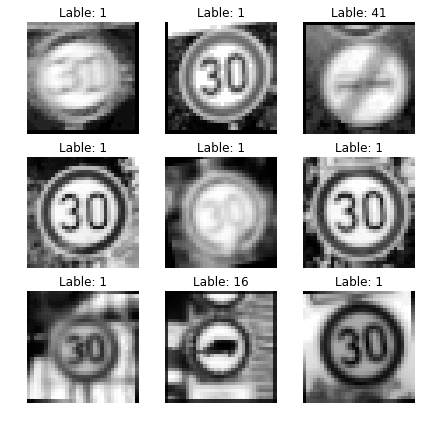

In [10]:
print('normalization...')

# normalization
X_extended = (X_extended-128)/128
X_valid = (X_valid-128)/128
X_test = (X_test-128)/128
print("result's examples")
f, axs = plt.subplots(3, 3, figsize=(7,7))
for i in range(9):
    axs[i//3, i%3].axis('off')
    axs[i//3, i%3].set_title('Lable: {}'.format(y_extended[images_list[i]].astype(int)))
    axs[i//3, i%3].imshow(X_extended[images_list[i],:,:,0], cmap='gray')

In [11]:
print("Extended train set:")
print('X_extended:   ', X_extended.dtype, X_extended.shape)
print('X_valid:      ', X_valid.dtype, X_valid.shape)
print('X_test:       ', X_test.dtype, X_test.shape)

Extended train set:
X_extended:    float32 (139196, 32, 32, 1)
X_valid:       float32 (4410, 32, 32, 1)
X_test:        float32 (12630, 32, 32, 1)


In [12]:
from sklearn.utils import shuffle

X_extended, y_extended = shuffle(X_extended, y_extended)

shuffle test:


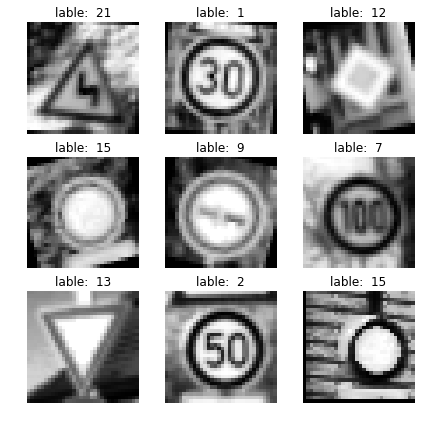

In [13]:
print("shuffle test:")
f, axs = plt.subplots(3, 3, figsize=(7,7))
for i in range(9):
    axs[i//3, i%3].axis('off')
    axs[i//3, i%3].set_title('lable:  {}'.format(y_extended[images_list[i]].astype(int)))
    axs[i//3, i%3].imshow(X_extended[images_list[i],:,:,0], cmap='gray')


### Model Architecture

In [14]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [15]:
def LeNet(x):
    mu = 0
    sigma = 0.001
    keep_rate = 0.9
    # layer 1_1 convolutional, input 32x32x1 output 28x28x100
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5,5,1,100), mean=mu, stddev=sigma, dtype=tf.float32))
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1,1,1,1], padding='VALID') + tf.Variable(tf.zeros(100))
    conv1 = tf.nn.relu(conv1)
    
    # maxpool, input 28x28x100 output 14x14x100
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # layer 2.1 convolutional, input 14x14x100 output 10x10x200
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5,5,100,200), mean=mu, stddev=sigma, dtype=tf.float32))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1,1,1,1], padding='VALID') + tf.Variable(tf.zeros(200))
    conv2 = tf.nn.relu(conv2)
    
    # maxpool, input 10x10x200 output 5x5x200
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # flatten output 5000
    conv2 = flatten(conv2)
    
    # maxpool, l1 branched out, double subsampling input 14x14x100 output 7x7x100
    conv1_bo = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    # flatten output 4900
    conv1_bo = flatten(conv1_bo)
    
    # 9900
    stage2 = tf.concat([conv2,conv1_bo], 1)
    
    # drop out
    stage2 = tf.nn.dropout(stage2, keep_rate)
    # layer 3 full connected 9900 features, 100 nodes
    fc1_w = tf.Variable(tf.truncated_normal(shape=(9900,100), mean=mu, stddev=sigma, dtype=tf.float32))
    fc1 = tf.matmul(stage2, fc1_w) + tf.Variable(tf.zeros(100))
    
    # layer 4 full connected 100 features, 43 nodes
    fc2_w = tf.Variable(tf.truncated_normal(shape=(100,43), mean=mu, stddev=sigma, dtype=tf.float32))
    logits = tf.matmul(fc1, fc2_w) + tf.Variable(tf.zeros(43))

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
EPOCHS = 20
BATCH_SIZE = 128
rate = 0.0009
n_extended_train = X_extended.shape[0]

In [17]:
x = tf.placeholder(dtype=tf.float32, shape=(None, 32, 32, 1))
y = tf.placeholder(dtype=tf.int32, shape=(None))
one_hot_y = tf.one_hot(y, 43)

In [18]:

logits = LeNet(x)

softmax_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
cost_function = tf.reduce_mean(softmax_cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(cost_function)

In [19]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(x_data, y_data):
    n_data = len(y_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, n_data, BATCH_SIZE):
        x_bached = x_data[offset:(offset+BATCH_SIZE)]
        y_bached = y_data[offset:(offset+BATCH_SIZE)]
        accuracy = sess.run(accuracy_operation, feed_dict={x: x_bached, y: y_bached})
        total_accuracy += accuracy*(len(y_bached))
    return total_accuracy/n_data

In [20]:
saver = tf.train.Saver()
init = tf.global_variables_initializer()

In [21]:
with tf.Session() as sess:
    sess.run(init)
    
    print("Training...")
    print()
    for n_epoch in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, n_extended_train, BATCH_SIZE):
            end = offset + BATCH_SIZE
            x_batched, y_batched = X_extended[offset:end], y_extended[offset:end]
            sess.run(training_operation, feed_dict={x: x_batched, y: y_batched})
        
        validation_accuracy = evaluate(X_valid, y_valid)
        
        print("EPOCH {} ...".format(n_epoch+1))
        print("Validation Accuracy = {:2.2f} %".format(100*validation_accuracy))
        print()
        
    saver.save(sess, './tmp/lenet.ckpt')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 93.70 %

EPOCH 2 ...
Validation Accuracy = 94.88 %

EPOCH 3 ...
Validation Accuracy = 95.74 %

EPOCH 4 ...
Validation Accuracy = 96.98 %

EPOCH 5 ...
Validation Accuracy = 97.12 %

EPOCH 6 ...
Validation Accuracy = 96.85 %

EPOCH 7 ...
Validation Accuracy = 98.07 %

EPOCH 8 ...
Validation Accuracy = 95.99 %

EPOCH 9 ...
Validation Accuracy = 96.98 %

EPOCH 10 ...
Validation Accuracy = 97.60 %

EPOCH 11 ...
Validation Accuracy = 96.85 %

EPOCH 12 ...
Validation Accuracy = 97.78 %

EPOCH 13 ...
Validation Accuracy = 97.30 %

EPOCH 14 ...
Validation Accuracy = 96.01 %

EPOCH 15 ...
Validation Accuracy = 97.71 %

EPOCH 16 ...
Validation Accuracy = 96.71 %

EPOCH 17 ...
Validation Accuracy = 97.69 %

EPOCH 18 ...
Validation Accuracy = 97.39 %

EPOCH 19 ...
Validation Accuracy = 97.96 %

EPOCH 20 ...
Validation Accuracy = 98.05 %

Model saved


In [22]:
### test final model with test data set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./tmp/'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:2.3f} %".format(100*test_accuracy))

INFO:tensorflow:Restoring parameters from ./tmp/lenet.ckpt
Test Accuracy = 96.033 %


In [23]:
### to show the train set accuracy:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./tmp/'))
    
    test_accuracy = evaluate(X_extended, y_extended)
    print("Train Accuracy = {:2.3f} %".format(100*test_accuracy))

INFO:tensorflow:Restoring parameters from ./tmp/lenet.ckpt
Train Accuracy = 99.793 %


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

sample show...
1st row shows rgb images
2nd row shows gray images
3rd row shows equilized gray images


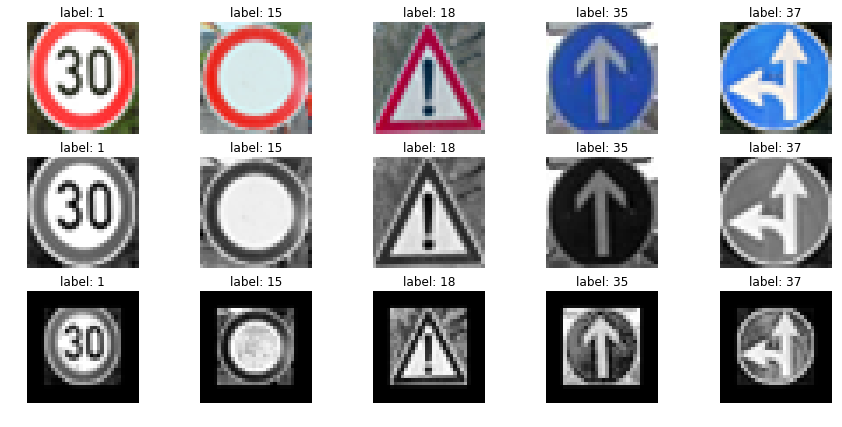

In [24]:
### Load the new images and plot them
images = np.empty((5,32,32,3))
for i in range(5):
    img = plt.imread('./test_images/0{}.png'.format(i+1))
    images[i] = img
    
yuv_img = rgb2yuv(images)
eh_img = histogram_equalizer(yuv_img*255)
for i in range(5):
    eh_img[i] = perturb_image(eh_img[i], 0, scale=0.7)
labels = np.array([1, 15, 18, 35, 37], dtype=np.int)
print('sample show...')
print('1st row shows rgb images')
print('2nd row shows gray images')
print('3rd row shows equilized gray images')

f, axs = plt.subplots(3, 5, figsize=(15,7))
for i in range(5):
    axs[0, i].axis('off')
    axs[0, i].set_title('label: {:d}'.format(labels[i]))
    axs[0, i].imshow(images[i])
for i in range(5):
    axs[1, i].axis('off')
    axs[1, i].set_title('label: {:d}'.format(labels[i]))
    axs[1, i].imshow(yuv_img[i,:,:,0], cmap='gray')
for i in range(5):
    axs[2, i].axis('off')
    axs[2, i].set_title('label: {:d}'.format(labels[i]))
    axs[2, i].imshow(eh_img[i,:,:,0], cmap='gray')

### Predict the Sign Type for Each Image

In [25]:
x_new, y_new = eh_img, labels

prediction = tf.argmax(logits, 1)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./tmp/'))
    result = sess.run(prediction, feed_dict={x: x_new})
    print(result)

INFO:tensorflow:Restoring parameters from ./tmp/lenet.ckpt
[ 1 25 18 35  2]


### Analyze Performance

In [26]:
### accuracy of model on new images 
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./tmp/'))
    
    test_accuracy = evaluate(x_new, y_new)
    print("Test Accuracy = {:2.2f} %".format(100*test_accuracy))

INFO:tensorflow:Restoring parameters from ./tmp/lenet.ckpt
Test Accuracy = 60.00 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [27]:
y_softmax = tf.nn.softmax(logits)
top_5_prob = tf.nn.top_k(y_softmax, k=5)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./tmp/'))
    output = sess.run(top_5_prob, feed_dict={x: x_new})
print(output)

INFO:tensorflow:Restoring parameters from ./tmp/lenet.ckpt
TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[ 1,  0,  2,  3,  4],
       [25,  0,  1,  2,  3],
       [18,  0,  1,  2,  3],
       [35,  0,  1,  2,  3],
       [26,  0,  1,  2,  3]], dtype=int32))


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [29]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")